# ECMM409-Courseworkexercise

# Calculating Distance Matrix 

In [1]:
import xmltodict
import matplotlib.pyplot as plt
import random
import numpy as np

nameofFile = "burma14.xml"
numOfedges = 14

xml_file = open(nameofFile, "r").read()
data = xmltodict.parse(xml_file)

edges = data["travellingSalesmanProblemInstance"]["graph"]["vertex"]
list = []
source = 0

for edge in edges:
    for i in edge["edge"]:
        item = [float(i["@cost"])]
        list.append(item)
    source = source + 1

matrix = []
temp_list = []
counter = 0

for i in range(0, numOfedges):
    for j in range(0, numOfedges):
        if i == j:
            temp_list.append(0)
        else:
            temp_list.append(list[counter][0])
            counter = counter + 1
    matrix.append(temp_list)
    temp_list = []

## Setup Population

In [2]:
tour_size = 10
sizeOfpopulation = 100
terminations = 10000

def noOfpopulations(sizeOfpopulation):
    population = []
    cities = [i for i in range(len(matrix))]
    while len(population) < sizeOfpopulation:
        path = cities.copy()  
        random.shuffle(path) 
        if path not in population:
            population.append(path)
    return population

## Calculating the Fitness Score

In [3]:
def totFitnessScore(path, distance_matrix):
    total_cost = 0
    num_vertices = len(distance_matrix)

    for i in range(len(path)):
        source_vertex = path[i]
        dest_vertex = path[(i + 1) % num_vertices]  
        cost_segment = distance_matrix[source_vertex][dest_vertex]
        total_cost += cost_segment

    return total_cost

def selOfTournament(population, tour_size ):
    top_way = None
    top_score = float('inf')  
    for _ in range(tour_size):
        random_index = random.randint(0, len(population) - 1)
        optimal_way = population[random_index]
        optimal_score = totFitnessScore(optimal_way, matrix)
        if optimal_score < top_score:
            top_way = optimal_way
            top_score = optimal_score
    return top_way, top_score

###  Performing Crossover 

In [4]:
def Crossoverimplementation(crossover_type, firstParent, secondParent):    
    if crossover_type == 'SINGLE_POINT_CROSSOVER':
        pointtoCrossover = random.randint(1, len(firstParent) - 1)
        firstChild = firstParent[:pointtoCrossover] + [city for city in secondParent if city not in firstParent[:pointtoCrossover]]
        secChild = secondParent[:pointtoCrossover] + [city for city in firstParent if city not in secondParent[:pointtoCrossover]]

        return firstChild, secChild
    
    elif crossover_type == 'DOUBLE_POINT_CROSSOVER':
        n = len(firstParent)
        points_toCrossover = sorted(random.sample(range(1, n), 2))
        p1, p2 = points_toCrossover

        firstChild = [-1] * n
        secChild = [-1] * n

        firstChild[p1:p2] = firstParent[p1:p2]
        secChild[p1:p2] = secondParent[p1:p2]

        idx_1, idx_2 = 0, 0

        for i in range(n):
            if p1 <= i < p2:
                continue

            while secondParent[idx_1] in firstChild:
                idx_1 = (idx_1 + 1) % n
            firstChild[i] = secondParent[idx_1]

            while firstParent[idx_2] in secChild:
                idx_2 = (idx_2 + 1) % n
            secChild[i] = firstParent[idx_2]

        return firstChild, secChild
    
    else:
        print("Error at Crossover!")

### Performing Mutation

In [5]:
def MutationImplementation(mutation_type, path):
    if mutation_type == 'SINGLE_SWAP_MUTATION':
        mutated_path = path[:]
        position_1, position_2 = random.sample(range(len(path)), 2)
        mutated_path[position_1], mutated_path[position_2] = mutated_path[position_2], mutated_path[position_1]
        
        return mutated_path
    
    elif mutation_type == 'MULTI_SWAP_MUTATION':
        mutated_path = path[:]
        num_swaps = random.randint(0, len(path) // 2)
        
        for _ in range(num_swaps):
            position_1, position_2 = random.sample(range(len(path)), 2)
            mutated_path[position_1], mutated_path[position_2] = mutated_path[position_2], mutated_path[position_1]
            
        return mutated_path
    
    elif mutation_type == 'INVERSION':
        mutated_path = path[:]
        position_1, position_2 = random.sample(range(len(path)), 2)
        start_idx, end_idx = min(position_1, position_2), max(position_1, position_2)
        mutated_path[start_idx:end_idx + 1] = reversed(mutated_path[start_idx:end_idx + 1])
        
        return mutated_path
    
    else:
        print("Error at mutation!")

### Performing Replacement

In [6]:
def ReplacementImplementation(population, firstChild, secChild, replacement_type):
    if replacement_type == 'REPLACE_WORST':
        first_Child_fitness = totFitnessScore(firstChild, matrix)
        Sec_Child_fitness = totFitnessScore(secChild, matrix)

        worst_index_1, worst_index_2 = 0, 1

        for i in range(2, len(population)):
            if totFitnessScore(population[i], matrix) > totFitnessScore(population[worst_index_1], matrix):
                worst_index_1, worst_index_2 = i, worst_index_2
            elif totFitnessScore(population[i], matrix) > totFitnessScore(population[worst_index_2], matrix):
                worst_index_2 = i

        population[worst_index_1] = firstChild
        population[worst_index_2] = secChild

        return population
    
    elif replacement_type == 'REPLACE_RANDOM':
        random_routes_to_replace = random.sample(population, 2)

        index_to_replace_0 = population.index(random_routes_to_replace[0])
        index_to_replace_1 = population.index(random_routes_to_replace[1])

        population[index_to_replace_0] = firstChild
        population[index_to_replace_1] = secChild

        return population
    
    else:
        print("Error at replacement!")

# Convergence curve for Burma 

[2, 13, 1, 0, 9, 8, 10, 7, 12, 6, 11, 5, 4, 3]
3323.0
[9, 0, 1, 13, 2, 3, 4, 5, 11, 6, 12, 7, 10, 8]
3323.0
[3, 2, 13, 1, 0, 9, 8, 10, 7, 12, 6, 11, 5, 4]
3323.0


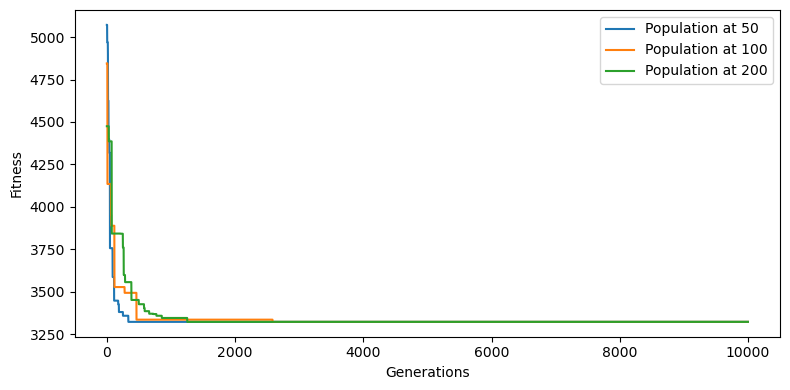

In [7]:
min_score_at_every_generation_for_different_population = {} 
populations = [50, 100, 200]

for sizeOfpopulation in populations:
    min_score_at_every_generation = []
    population = noOfpopulations(sizeOfpopulation)
    generation = 0
    while generation <= terminations:
        scores = []
        firstParent = selOfTournament(population, tour_size)
        secondParent = selOfTournament(population, tour_size)
        parent_1_path = firstParent[0]
        parent_2_path = secondParent[0]
        firstChild, secChild = Crossoverimplementation('SINGLE_POINT_CROSSOVER', parent_1_path, parent_2_path)
        chid_1_after_mutation = MutationImplementation('SINGLE_SWAP_MUTATION', firstChild)
        chid_2_after_mutation = MutationImplementation('SINGLE_SWAP_MUTATION', secChild)
        population = ReplacementImplementation(population, chid_1_after_mutation, chid_2_after_mutation, 'REPLACE_WORST')

        for i in population:
            score = totFitnessScore(i, matrix)
            scores.append(score)

        min_score_at_every_generation.append(min(scores))
        generation += 1
        
        
    min_score_index = scores.index(min(scores))
    print(population[min_score_index])
    print(min(scores)) 
    min_score_at_every_generation_for_different_population[sizeOfpopulation] = min_score_at_every_generation
    

x_values = values_list = [i for i in range(terminations + 1)]  
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for (sizeOfpopulation, scores) in min_score_at_every_generation_for_different_population.items():
    ax_1.plot(x_values, scores, label= "Population at " + str(sizeOfpopulation))
        
ax_1.legend(loc=0)
ax_1.set_xlabel('Generations')
ax_1.set_ylabel('Fitness')
fig_1.tight_layout()

# Changing tournament Size for Burma

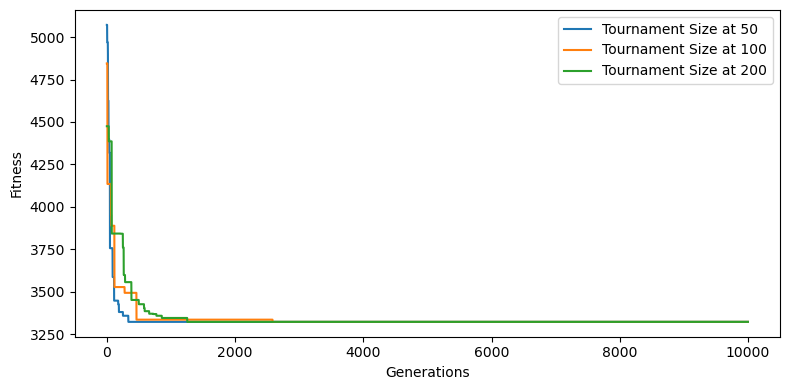

In [8]:
min_score_at_every_generation_for_different_tour_size = {} 
tournaments = [5, 10, 20]

for tour_size in tournaments:
    min_score_at_every_generation = []
    population = noOfpopulations(150)
    generation = 0
    while generation <= terminations:
        scores = []
        firstParent = selOfTournament(population, tour_size)
        secondParent = selOfTournament(population, tour_size)
        parent_1_path = firstParent[0]
        parent_2_path = secondParent[0]
        firstChild, secChild = Crossoverimplementation('SINGLE_POINT_CROSSOVER', parent_1_path, parent_2_path)
        chid_1_after_mutation = MutationImplementation('SINGLE_SWAP_MUTATION', firstChild)
        chid_2_after_mutation = MutationImplementation('SINGLE_SWAP_MUTATION', secChild)
        population = ReplacementImplementation(population, chid_1_after_mutation, chid_2_after_mutation, 'REPLACE_WORST')

        for i in population:
            score = totFitnessScore(i, matrix)
            scores.append(score)

        min_score_at_every_generation.append(min(scores))
        generation += 1
    min_score_at_every_generation_for_different_tour_size[tour_size] = min_score_at_every_generation
    

x_values = values_list = [i for i in range(terminations + 1)]  
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for (tour_size, scores) in min_score_at_every_generation_for_different_population.items():
    ax_1.plot(x_values, scores, label= "Tournament Size at " + str(tour_size))
        
ax_1.legend(loc=0)
ax_1.set_xlabel('Generations')
ax_1.set_ylabel('Fitness')
fig_1.tight_layout()

# Changing crossover type for Burma

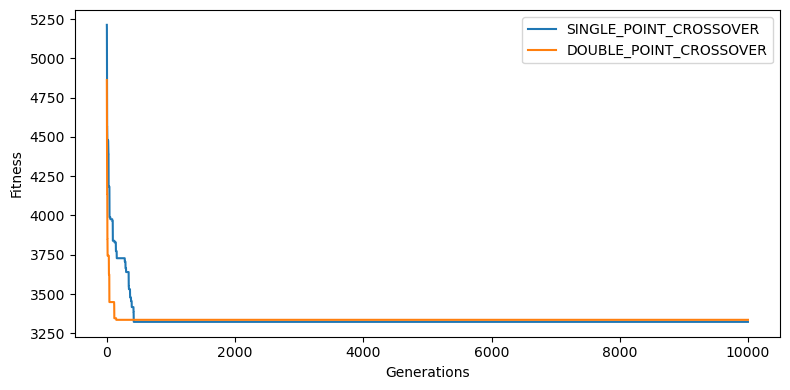

In [9]:
min_score_at_every_generation_for_different_crossover = {} # Holds the minimum value of the population at each generation for the convergence graph
crossovers = ['SINGLE_POINT_CROSSOVER', 'DOUBLE_POINT_CROSSOVER']

for crossover in crossovers:
    min_score_at_every_generation = []
    population = noOfpopulations(100)
    generation = 0
    while generation <= terminations:
        scores = []
        firstParent = selOfTournament(population, tour_size)
        secondParent = selOfTournament(population, tour_size)
        parent_1_path = firstParent[0]
        parent_2_path = secondParent[0]
        firstChild, secChild = Crossoverimplementation(crossover, parent_1_path, parent_2_path)
        chid_1_after_mutation = MutationImplementation('SINGLE_SWAP_MUTATION', firstChild)
        chid_2_after_mutation = MutationImplementation('SINGLE_SWAP_MUTATION', secChild)
        population = ReplacementImplementation(population, chid_1_after_mutation, chid_2_after_mutation, 'REPLACE_WORST')

        for i in population:
            score = totFitnessScore(i, matrix)
            scores.append(score)

        min_score_at_every_generation.append(min(scores))
        generation += 1
    min_score_at_every_generation_for_different_crossover[crossover] = min_score_at_every_generation
    

    

x_values = values_list = [i for i in range(terminations + 1)]  
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for (crossover, scores) in min_score_at_every_generation_for_different_crossover.items():
    ax_1.plot(x_values, scores, label= crossover)
        
ax_1.legend(loc=0)
ax_1.set_xlabel('Generations')
ax_1.set_ylabel('Fitness')
fig_1.tight_layout()

# Changing mutations type for Burma

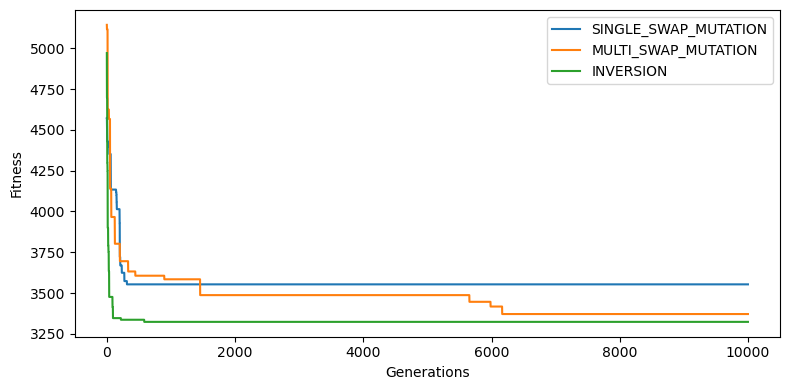

In [10]:
min_score_at_every_generation_for_different_mutation = {} # Holds the minimum value of the population at each generation for the convergence graph
mutations = ['SINGLE_SWAP_MUTATION', 'MULTI_SWAP_MUTATION', 'INVERSION']

for mutation in mutations:
    min_score_at_every_generation = []
    population = noOfpopulations(100)
    generation = 0
    while generation <= terminations:
        scores = []
        firstParent = selOfTournament(population, tour_size)
        secondParent = selOfTournament(population, tour_size)
        parent_1_path = firstParent[0]
        parent_2_path = secondParent[0]
        chid_1_after_mutation = MutationImplementation(mutation, firstChild)
        chid_2_after_mutation = MutationImplementation(mutation, secChild)
        population = ReplacementImplementation(population, chid_1_after_mutation, chid_2_after_mutation, 'REPLACE_WORST')

        for i in population:
            score = totFitnessScore(i, matrix)
            scores.append(score)

        min_score_at_every_generation.append(min(scores))
        generation += 1
    min_score_at_every_generation_for_different_mutation[mutation] = min_score_at_every_generation

x_values = values_list = [i for i in range(terminations + 1)]  
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for (mutation, scores) in min_score_at_every_generation_for_different_mutation.items():
    ax_1.plot(x_values, scores, label= mutation)
        
ax_1.legend(loc=0)
ax_1.set_xlabel('Generations')
ax_1.set_ylabel('Fitness')
fig_1.tight_layout()